# Regression in Scikit-Learn


In [16]:
# import Libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df_linear=df[["age","fare"]]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [19]:
X=df[['age']]
y=df['fare']

In [20]:
X.isnull().sum()/len(X)*100

age    19.86532
dtype: float64

In [21]:
y.isnull().sum()/len(y)*100

0.0

In [22]:
X

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [23]:
df_linear.age.fillna(value=df_linear['age'].mean(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14308\1377016597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(),inplace=True)


In [24]:
df_linear

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [25]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

In [26]:
X.shape

(891, 1)

In [27]:
y.shape

(891,)

In [28]:
#plot
df=X+y

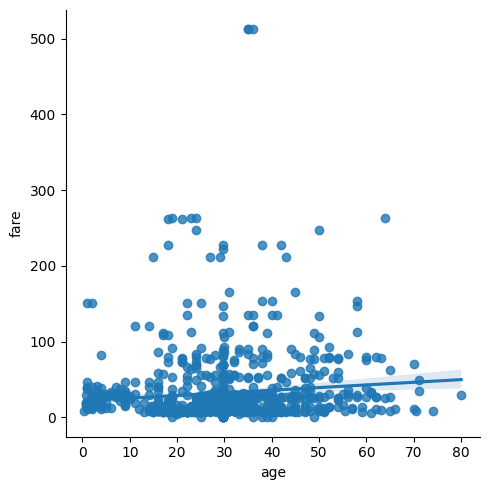

In [29]:
sns.lmplot(data=df_linear,x='age',y='fare')

<AxesSubplot: ylabel='age'>

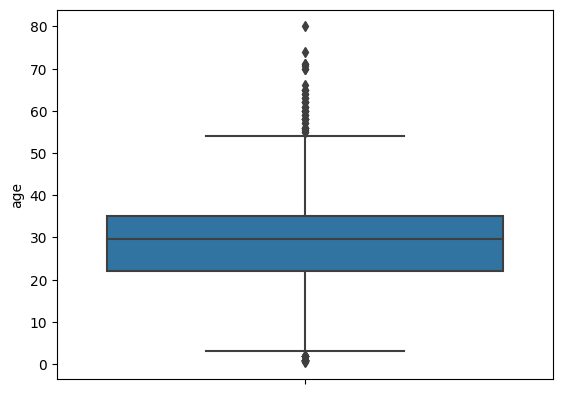

In [30]:
sns.boxplot(data=df_linear,y='age')

In [31]:
# delete outlier

df_linear=df_linear[(df_linear['age']>8) & (df_linear['age']<50)]

<AxesSubplot: ylabel='age'>

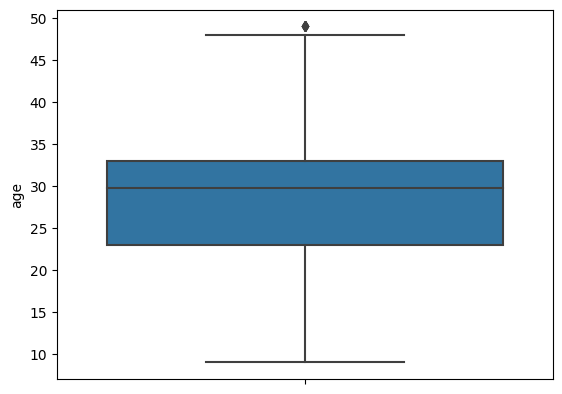

In [32]:
sns.boxplot(data=df_linear,y='age')

<AxesSubplot: ylabel='fare'>

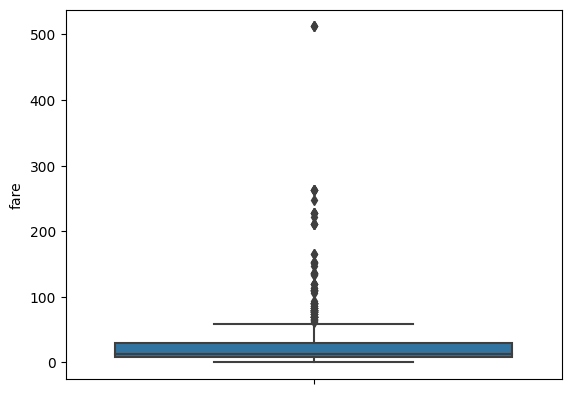

In [33]:
sns.boxplot(data=df_linear,y='fare')

In [34]:
df_linear['fare'].min()

0.0

In [35]:
# delete outlier

df_linear=df_linear[(df_linear['fare']>1) & (df_linear['fare']<40)]

<AxesSubplot: ylabel='fare'>

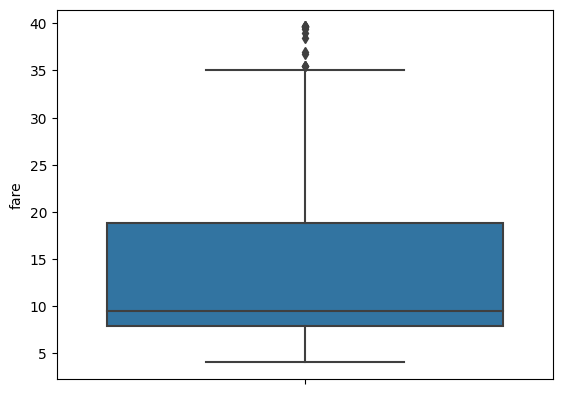

In [36]:
sns.boxplot(data=df_linear,y='fare')

In [37]:
X=df_linear[['age']]
y=df_linear['fare']

In [38]:
# Libararies of model import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Call Model
model=LinearRegression()

# Train the Model
model.fit(X,y)

LinearRegression()

In [39]:
model.predict([[25]])

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.51193182])

In [40]:
#model evaluation with metrics
#r2
#mean squared error
#MAE
#RMSE
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.8)

# MODEL

model=LinearRegression()

#train
model.fit(X_train,y_train)

#prediction
predictions=model.predict(X_test)

In [41]:
X_train.shape

(482, 1)

In [42]:
X_test.shape

(121, 1)

<AxesSubplot: xlabel='fare'>

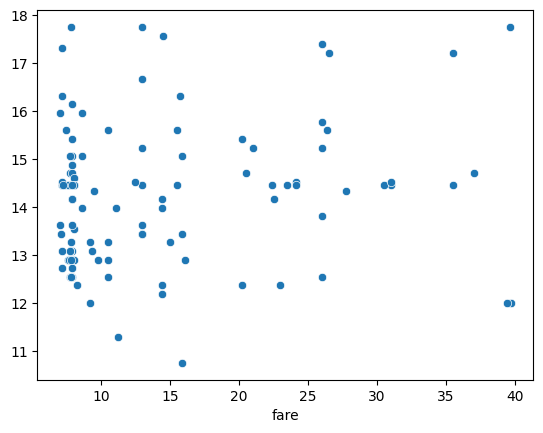

In [43]:
sns.scatterplot(x=y_test,y=predictions)

In [44]:
model.score(X_test,y_test)

0.011369814496317798

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE=mean_absolute_error(y_true=y_test,y_pred=predictions)
MSE=mean_squared_error(y_true=y_test,y_pred=predictions)
RMSE=mean_squared_error(y_true=y_test,y_pred=predictions,squared=False)
R2=r2_score(y_true=y_test,y_pred=predictions)

print("MAE: " ,MAE)
print("MSE: " ,MSE)
print("RMSE: " ,RMSE)
print("R_squared: ",R2)


MAE:  6.868426476187942
MSE:  71.78466055770936
RMSE:  8.472582874053776
R_squared:  0.011369814496317798


In [46]:
# How to get Root Mean Square

import numpy as np
RMSE= np.sqrt(MSE)
RMSE

8.472582874053776

# DECISION TREE CLASSIFICATION

In [47]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree


In [48]:
df=sns.load_dataset('titanic')

In [49]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [50]:
X=pd.get_dummies(X,columns=['sex'])

In [51]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [52]:
X.age.fillna(value=X['age'].mean(),inplace=True)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred=model.predict(X_test)

In [56]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8324022346368715


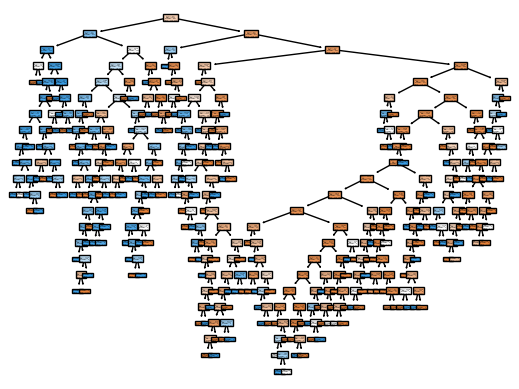

<Figure size 640x480 with 0 Axes>

In [57]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("tree.png")


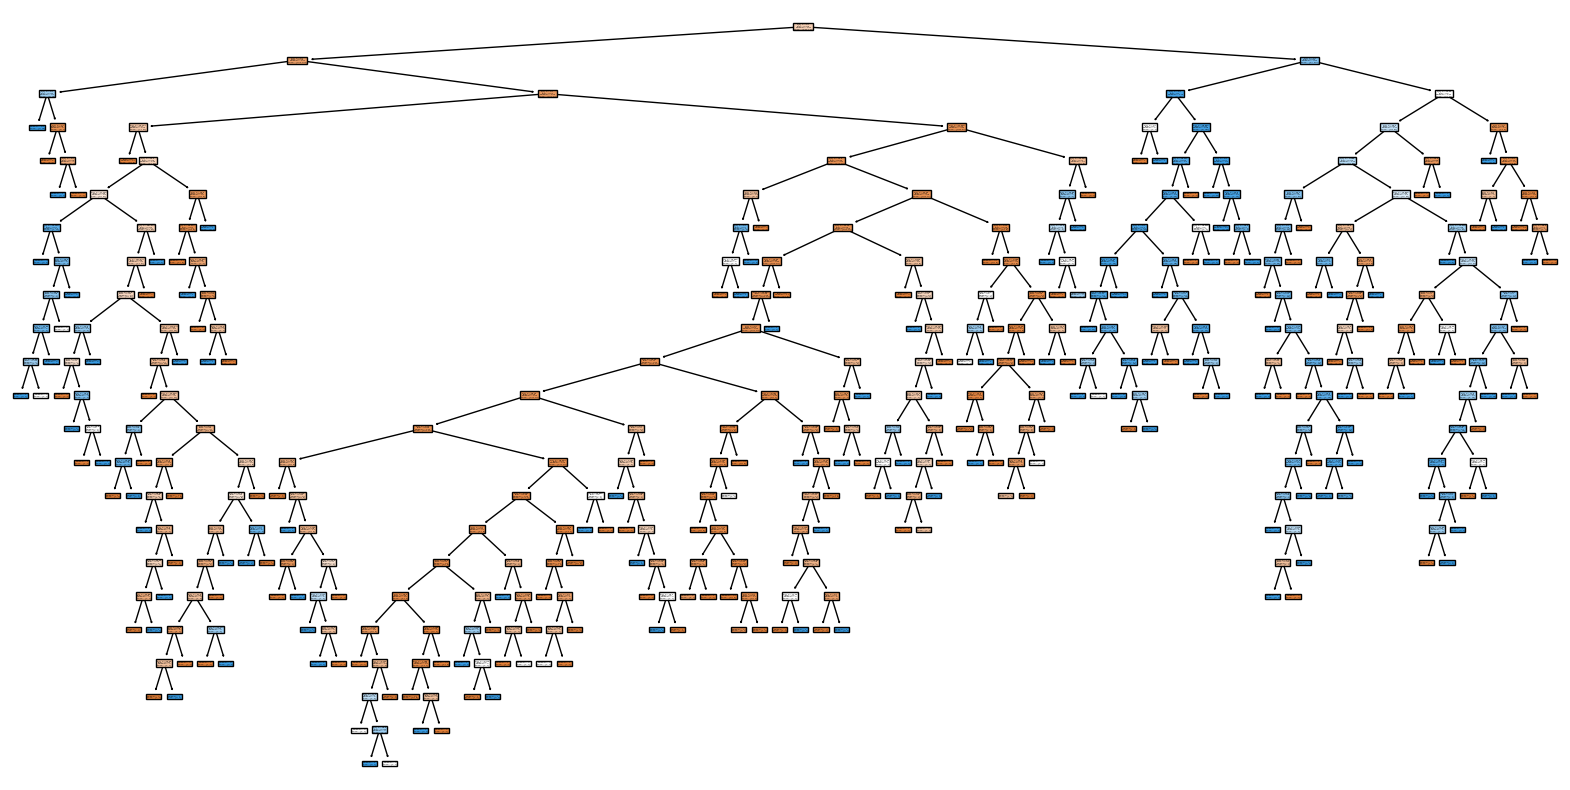

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("decision_tree.pdf",format="pdf",dpi=300)

In [59]:
#import libararies
from sklearn.metrics import precision_score,recall_score,f1_score


In [60]:
# precision
precision_score(y_test,y_pred)

0.746031746031746

In [61]:
#recall
recall_score(y_test,y_pred)

0.7704918032786885

In [62]:
#f1score
f1_score(y_test,y_pred)

0.7580645161290323

In [63]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

NameError: name 'tick_marks' is not defined

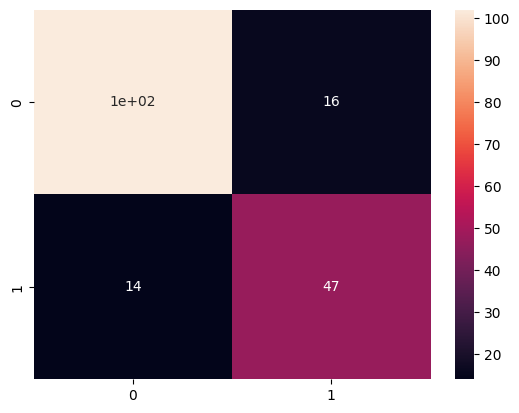

In [64]:
sns.heatmap(cm,annot=True)
plt.xticks(tick_marks,["Not Survived","Survived"])
plt.yticks(tick_marks,["Not Survived","Survived"])
plt.ylabel['True label']

# K Nearest Neighbours (KNN)

In [65]:

from  sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[97, 21],
       [23, 38]], dtype=int64)

In [66]:
precision_score(y_test,y_pred)

0.6440677966101694

In [67]:
recall_score(y_test,y_pred)

0.6229508196721312

In [68]:
f1_score(y_test,y_pred)

0.6333333333333334

Text(0.5, 23.52222222222222, 'Predicted label')

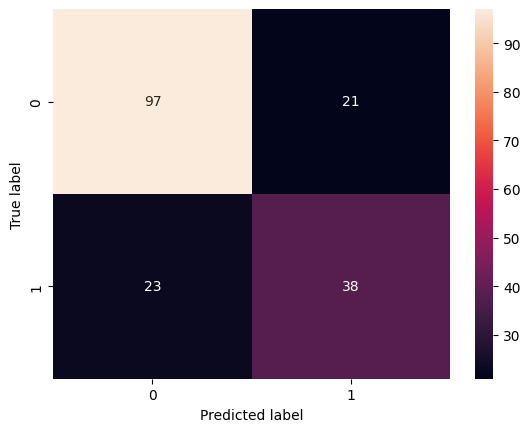

In [69]:
sns.heatmap(cm,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print("Confusion Matrix: ", cm)
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[107  11]
 [ 18  43]]
Precision Score:  0.7962962962962963
Recall Score:  0.7049180327868853
F1 Score:  0.7478260869565216


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print("Confusion Matrix: ", cm)
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[99 19]
 [18 43]]
Precision Score:  0.6935483870967742
Recall Score:  0.7049180327868853
F1 Score:  0.6991869918699187


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support vector machine (SVM)

In [72]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print("Confusion Matrix: ", cm)
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[105  13]
 [ 39  22]]
Precision Score:  0.6285714285714286
Recall Score:  0.36065573770491804
F1 Score:  0.45833333333333337


# NAIVE BYES

In [73]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print("Confusion Matrix: ", cm)
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[99 19]
 [20 41]]
Precision Score:  0.6833333333333333
Recall Score:  0.6721311475409836
F1 Score:  0.6776859504132232


In [77]:
#Libraries and Model Import

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Define the models to be evaluated
models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC()]
names=["LogisticRegression","KNN","Random Forest","SVM"]

#Perform k-fold cross validation for each model
k = 10
for name,model in zip(names,models):
    cv_scores=cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/-{np.std(cv_scores):.3f}")



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegression CV accuracy: 0.792 +/-0.041
KNN CV accuracy: 0.726 +/-0.055
Random Forest CV accuracy: 0.800 +/-0.032
SVM CV accuracy: 0.676 +/-0.042


#HYPER PARAMETER TURNING FOR CHECK BEST OF ALGORITHM

In [94]:
from sklearn.model_selection import GridSearchCV
#Defining the parameter grid
param_grid={'C':[0.1, 1,10],
            'kernel':['linear','rbf'],
            'gamma':[0.1, 1,10]}

grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score:0.78


# FIT FOR ALL

# BEST MODEL SELECTION USING FOR LOOPS

In [111]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset("titanic")
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']
X=pd.get_dummies(X,columns=['sex'])
X.age.fillna(value=X['age'].mean(),inplace=True)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
model_names=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
models_scores=[]
for model,model_name in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    models_scores.append([model_name,accuracy])
sorted_models=sorted(models_scores,key=lambda x: x[1],reverse=True)
for model in sorted_models:
    print("Accuracy Score: ",f'{model[0]} : {model[1]:.2f}')

Accuracy Score:  Logistic Regression : 0.81
Accuracy Score:  Random Forest : 0.81
Accuracy Score:  Decision Tree : 0.77
Accuracy Score:  KNN : 0.69
Accuracy Score:  SVM : 0.66


In [114]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
model_names=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
models_scores=[]
for model,model_name in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Precision=precision_score(y_test,y_pred)
    models_scores.append([model_name,accuracy])
sorted_models=sorted(models_scores,key=lambda x: x[1],reverse=True)
for model in sorted_models:
    print("Precision Score: ",f'{model[0]} : {model[1]:.2f}')

Precision Score:  Logistic Regression : 0.69
Precision Score:  SVM : 0.69
Precision Score:  Decision Tree : 0.69
Precision Score:  Random Forest : 0.69
Precision Score:  KNN : 0.69


In [115]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
model_names=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
models_scores=[]
for model,model_name in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Recall=recall_score(y_test,y_pred)
    models_scores.append([model_name,accuracy])
sorted_models=sorted(models_scores,key=lambda x: x[1],reverse=True)
for model in sorted_models:
    print("Recall Score: ",f'{model[0]} : {model[1]:.2f}')

Recall Score:  Logistic Regression : 0.69
Recall Score:  SVM : 0.69
Recall Score:  Decision Tree : 0.69
Recall Score:  Random Forest : 0.69
Recall Score:  KNN : 0.69
